# Importing Libraries

In [91]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Image Datas

In [101]:
train_path = 'myFaces/Me/train'
test_path  = 'myFaces/Me/test'
valid_path = 'myFaces/Me/valid'

In [110]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['Me'],batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['Me'],batch_size = 4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['Me'],batch_size = 10)

Found 640 images belonging to 1 classes.
Found 256 images belonging to 1 classes.
Found 14 images belonging to 1 classes.


# Plotting Images with Labels

In [111]:
#plotting image with labels
def plots(ims, figsize=(12,6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [112]:
imgs, labels = next(train_batches)

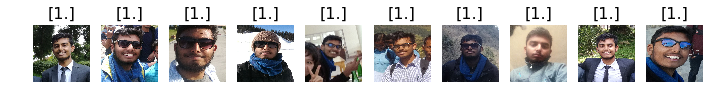

In [113]:
plots(imgs,titles = labels)

# Building and Training a CNN

In [114]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(1, activation = 'softmax'),
])

In [115]:
model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [116]:
model.fit_generator(train_batches, steps_per_epoch = 64,
                   validation_data = valid_batches, validation_steps = 25, epochs = 5, verbose = 2)

Epoch 1/5


ValueError: You are passing a target array of shape (10, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.